In [1]:
# widen jupyter notebook window
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:75% !important; }</style>"))

In [2]:
import sys

sys.path.insert(0, '/media/rich/Home_Linux_partition1/github_repos/tensorly')

import numpy as np

# Import PyTorch
import torch
import torch.nn as nn
from torch.autograd import Variable

# # Import TensorLy
# import tensorly as tl
# from tensorly.tucker_tensor import tucker_to_tensor
# from tensorly.random import check_random_state

In [3]:
sys.path.insert(0, '/media/rich/Home_Linux_partition1/github_repos/tensorly')

import tensorly as tl
import tensorly.decomposition
import tensorly.random


In [4]:
import platform; print(platform.platform())
import sys; print("Python", sys.version)
import numpy; print("NumPy", numpy.__version__)
import scipy; print("SciPy", scipy.__version__)
import tensorly; print("TensorLy", tensorly.__version__)
import torch; print("PyTorch", torch.__version__)

Linux-5.4.0-54-generic-x86_64-with-glibc2.10
Python 3.8.5 (default, Sep  4 2020, 07:30:14) 
[GCC 7.3.0]
NumPy 1.19.2
SciPy 1.5.2
TensorLy 0.5.0
PyTorch 1.7.0


In [5]:
tl.set_backend('pytorch')

Make the results reproducible by fixing the random seed

In [6]:
random_state = 1234
rng = tensorly.random.check_random_state(random_state)
device = 'cuda:0'
# device = 'cpu'

Define a random tensor which we will try to decompose. We wrap our tensors in Variables so we can backpropagate through them:



In [7]:
shape = [500, 50, 500, 2]
tensor = tl.tensor(rng.random_sample(shape), device=device, requires_grad=True)

Initialise a random Tucker decomposition of that tensor



In [8]:
### import data

dir_inputTensor = f'/media/rich/bigSSD RH/res2p/Camera data/round 4 experiments/mouse 6.28/20201102/cam3/run3'
fileName_inputTensor = f'Sxx_allPixels.npy'
path_inputTensor = f'{dir_inputTensor}/{fileName_inputTensor}'
inputTensor = np.load(path_inputTensor)

In [9]:
tensor = tl.tensor(inputTensor[:,:,:1000, :] , device=device , requires_grad=True)
# tensor = tl.tensor(tensor[ , device=device , requires_grad=True)

import gc

del inputTensor
gc.collect()

In [10]:
rank_toUse = 6
ranks = [rank_toUse , rank_toUse, rank_toUse , rank_toUse]
# core = tl.tensor(rng.random_sample(ranks), device=device, requires_grad=True)
factors = [tl.tensor(rng.random_sample((tensor.shape[i], ranks[i])),
                 device=device, requires_grad=True) for i in range(tl.ndim(tensor))]

weights = tl.tensor(np.ones(rank_toUse) , device=device, requires_grad=True)

In [11]:
type(np.array(factors))
torch.tensor(factors)

ValueError: only one element tensors can be converted to Python scalars

In [ ]:
# Now we just iterate through the training loop and backpropagate...

import time

n_iter = 1000
lr = 0.05
penalty = 0.1

prox_plus = nn.Threshold(0,0) ## to make all output postive 

optimizer = torch.optim.Adam(factors, lr=lr)

tic = time.time()
for i in range(1, n_iter):
    print(f'hi {i}')
    # Important: do not forget to reset the gradients
    optimizer.zero_grad()

    # Reconstruct the tensor from the decomposed form
#     rec = tucker_to_tensor((core, factors))
    rec = prox_plus(tl.cp_tensor.cp_to_tensor((weights, factors)))

    # squared l2 loss
#     loss = (tl.norm(rec - tensor, 2)).cpu().detach()
    loss = tl.norm((rec - tensor), 2)

    # squared l2 penalty on the factors of the decomposition
    for f in factors:
        loss = loss + penalty * f.pow(2).sum()

    loss.backward()
    optimizer.step()
    
#     factors = np.abs(factors)

    if i % 1 == 0:
        toc = time.time()
        print(round(toc-tic,2))
        rec_error = tl.norm(rec.data - tensor.data, 2)/tl.norm(tensor.data, 2)
        print("Epoch {},. Rec. error: {}".format(i, rec_error))
        tic = time.time()

In [ ]:
type(torch.tensor(rng.random_sample((tensor.shape[0], ranks[0]))))

In [ ]:
list((task1.factors1 , task1.factors2))

In [16]:
task1.factors1

Parameter containing:
tensor([[nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan],
        ...,
        [nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan]], device='cuda:0', dtype=torch.float64,
       requires_grad=True)

In [44]:
#basic libary
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
import pandas as pd


##Define Function and class to be used

prox_plus = nn.Threshold(0,0) ## to make all output postive 

class NTF(nn.Module):## Model for task 1
    def __init__(self):
        super(NTF, self).__init__()
#         self.A = nn.Parameter(torch.rand(v, d, requires_grad=True))
#         self.B = nn.Parameter(torch.rand(d, t, requires_grad=True))
#         self.factors = nn.Parameter(factors, requires_grad=True)
        
        self.factors1 = nn.Parameter(torch.tensor(rng.random_sample((tensor.shape[0], ranks[0])) , device='cuda:0').double(), requires_grad=True) 
        self.factors2 = nn.Parameter(torch.tensor(rng.random_sample((tensor.shape[1], ranks[1])) , device='cuda:0').double(), requires_grad=True) 
        self.factors3 = nn.Parameter(torch.tensor(rng.random_sample((tensor.shape[2], ranks[2])) , device='cuda:0').double(), requires_grad=True) 
        self.factors4 = nn.Parameter(torch.tensor(rng.random_sample((tensor.shape[3], ranks[3])) , device='cuda:0').double(), requires_grad=True) 

#         self.factors = [nn.Parameter(torch.tensor(rng.random_sample((tensor.shape[0], ranks[0]))),
# #                  device=device, requires_grad=True) for i in range(tl.ndim(tensor))]
#                  requires_grad=True) for i in range(tl.ndim(tensor))]

    def forward(self):
#        return (self.AA>0.5).float()
#         return prox_plus(torch.matmul(self.A, torch.transpose(self.B, 0, 1)))
#         return prox_plus(torch.matmul(self.A, self.B))
        tmp = list((task1.factors1 , task1.factors2 , task1.factors3 , task1.factors4))
        return prox_plus(tl.cp_tensor.cp_to_tensor((weights, tmp))).double()
    

## Task 1 Training
print('Start training on Task 1...')
# #Set dimension parpemeter and d
# v = 500
# d = 50
# t = 10

# gratorch = torch.randn(500, 10)
gratorch = tensor.double()

task1 = NTF()
n_epoch =5000
lr = 0.002
loss_fn = nn.MSELoss(reduction='sum')
task1loss=[] #collect loss
# optimizer = optim.SGD(task1.parameters(), lr=0.002)
optimizer = torch.optim.Adam(task1.parameters(), lr=lr)

for epoch in range(n_epoch):
    Y_ = task1()
#     loss = loss_fn(Y_, gratorch)
    loss = tl.norm((Y_ - gratorch), 2)
    task1.zero_grad() # need to clear the old gradients
    loss.backward()
    optimizer.step()
#    task1loss.append(loss)
    if(epoch%10==0):
        task1loss.append(loss)
        print(loss)
        
print('Learning curve for Task 1')

plt.figure()
plt.plot(task1loss[1:])
plt.ylabel('loss over time')
plt.xlabel('iteration x 10')
plt.show()

print('Final loss on Task 1: ')
print(task1loss[-1])

Start training on Task 1...
tensor(13974.7447, device='cuda:0', dtype=torch.float64,
       grad_fn=<NormBackward1>)
tensor(13652.2792, device='cuda:0', dtype=torch.float64,
       grad_fn=<NormBackward1>)
tensor(13302.2080, device='cuda:0', dtype=torch.float64,
       grad_fn=<NormBackward1>)
tensor(12924.6674, device='cuda:0', dtype=torch.float64,
       grad_fn=<NormBackward1>)
tensor(12523.2332, device='cuda:0', dtype=torch.float64,
       grad_fn=<NormBackward1>)
tensor(12105.3641, device='cuda:0', dtype=torch.float64,
       grad_fn=<NormBackward1>)
tensor(11682.0897, device='cuda:0', dtype=torch.float64,
       grad_fn=<NormBackward1>)
tensor(11266.8317, device='cuda:0', dtype=torch.float64,
       grad_fn=<NormBackward1>)
tensor(10873.2963, device='cuda:0', dtype=torch.float64,
       grad_fn=<NormBackward1>)
tensor(10512.8894, device='cuda:0', dtype=torch.float64,
       grad_fn=<NormBackward1>)
tensor(10192.6938, device='cuda:0', dtype=torch.float64,
       grad_fn=<NormBackw

tensor(7965.9234, device='cuda:0', dtype=torch.float64,
       grad_fn=<NormBackward1>)
tensor(7958.6273, device='cuda:0', dtype=torch.float64,
       grad_fn=<NormBackward1>)
tensor(7951.5165, device='cuda:0', dtype=torch.float64,
       grad_fn=<NormBackward1>)
tensor(7944.5915, device='cuda:0', dtype=torch.float64,
       grad_fn=<NormBackward1>)
tensor(7937.8528, device='cuda:0', dtype=torch.float64,
       grad_fn=<NormBackward1>)
tensor(7931.3002, device='cuda:0', dtype=torch.float64,
       grad_fn=<NormBackward1>)
tensor(7924.9331, device='cuda:0', dtype=torch.float64,
       grad_fn=<NormBackward1>)
tensor(7918.7508, device='cuda:0', dtype=torch.float64,
       grad_fn=<NormBackward1>)
tensor(7912.7516, device='cuda:0', dtype=torch.float64,
       grad_fn=<NormBackward1>)
tensor(7906.9333, device='cuda:0', dtype=torch.float64,
       grad_fn=<NormBackward1>)
tensor(7901.2930, device='cuda:0', dtype=torch.float64,
       grad_fn=<NormBackward1>)
tensor(7895.8273, device='cuda:0

tensor(7685.0534, device='cuda:0', dtype=torch.float64,
       grad_fn=<NormBackward1>)
tensor(7683.7744, device='cuda:0', dtype=torch.float64,
       grad_fn=<NormBackward1>)
tensor(7682.5075, device='cuda:0', dtype=torch.float64,
       grad_fn=<NormBackward1>)
tensor(7681.2527, device='cuda:0', dtype=torch.float64,
       grad_fn=<NormBackward1>)
tensor(7680.0102, device='cuda:0', dtype=torch.float64,
       grad_fn=<NormBackward1>)
tensor(7678.7799, device='cuda:0', dtype=torch.float64,
       grad_fn=<NormBackward1>)
tensor(7677.5622, device='cuda:0', dtype=torch.float64,
       grad_fn=<NormBackward1>)
tensor(7676.3572, device='cuda:0', dtype=torch.float64,
       grad_fn=<NormBackward1>)
tensor(7675.1654, device='cuda:0', dtype=torch.float64,
       grad_fn=<NormBackward1>)
tensor(7673.9871, device='cuda:0', dtype=torch.float64,
       grad_fn=<NormBackward1>)
tensor(7672.8226, device='cuda:0', dtype=torch.float64,
       grad_fn=<NormBackward1>)
tensor(7671.6727, device='cuda:0

tensor(7624.8166, device='cuda:0', dtype=torch.float64,
       grad_fn=<NormBackward1>)
tensor(7624.5870, device='cuda:0', dtype=torch.float64,
       grad_fn=<NormBackward1>)
tensor(7624.3604, device='cuda:0', dtype=torch.float64,
       grad_fn=<NormBackward1>)
tensor(7624.1367, device='cuda:0', dtype=torch.float64,
       grad_fn=<NormBackward1>)
tensor(7623.9158, device='cuda:0', dtype=torch.float64,
       grad_fn=<NormBackward1>)
tensor(7623.6976, device='cuda:0', dtype=torch.float64,
       grad_fn=<NormBackward1>)
tensor(7623.4822, device='cuda:0', dtype=torch.float64,
       grad_fn=<NormBackward1>)
tensor(7623.2694, device='cuda:0', dtype=torch.float64,
       grad_fn=<NormBackward1>)
tensor(7623.0591, device='cuda:0', dtype=torch.float64,
       grad_fn=<NormBackward1>)
tensor(7622.8513, device='cuda:0', dtype=torch.float64,
       grad_fn=<NormBackward1>)
tensor(7622.6458, device='cuda:0', dtype=torch.float64,
       grad_fn=<NormBackward1>)
tensor(7622.4427, device='cuda:0

KeyboardInterrupt: 

In [ ]:
del tensor
# del core
del factors
del rec

In [ ]:
del optimizer
del loss

In [11]:
import gc
gc.collect()

111

In [14]:
torch.cuda.empty_cache()

In [49]:
loss = tl.norm((tl.cp_tensor.cp_to_tensor((weights, factors))) - tensor, 2)


RuntimeError: CUDA out of memory. Tried to allocate 7.48 GiB (GPU 0; 23.69 GiB total capacity; 15.22 GiB already allocated; 6.93 GiB free; 15.23 GiB reserved in total by PyTorch)

<IPython.core.display.Javascript object>


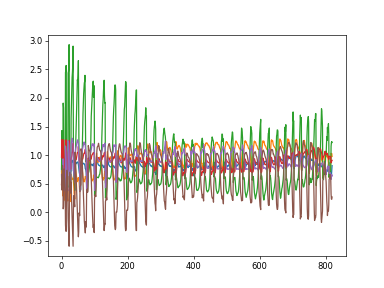

<IPython.core.display.Javascript object>


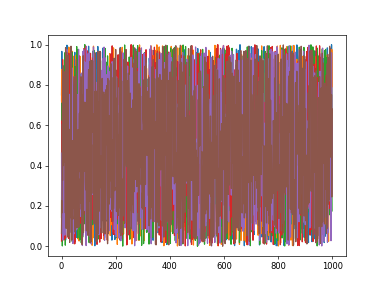

<IPython.core.display.Javascript object>


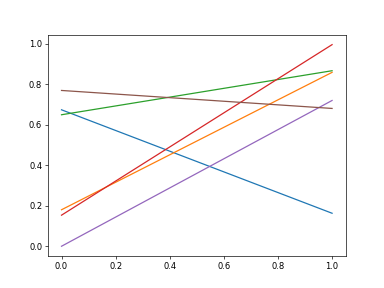

<IPython.core.display.Javascript object>


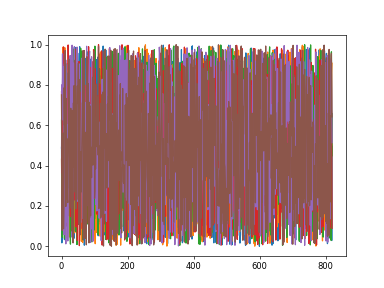

In [46]:
import matplotlib.pyplot as plt
%matplotlib notebook

plt.figure()
plt.plot(task1.factors1.cpu().detach().numpy())
plt.figure()
plt.plot(factors[2].cpu().detach().numpy())
plt.figure()
plt.plot(factors[3].cpu().detach().numpy())
plt.figure()
plt.plot(factors[0].cpu().detach().numpy())

In [172]:
del tensor
# del core
del factors
del rec

NameError: name 'rec' is not defined

In [167]:
del rec_error

NameError: name 'rec_error' is not defined

In [174]:
del optimizer
del loss

NameError: name 'optimizer' is not defined

In [175]:
import gc
gc.collect()

155

In [177]:
torch.cuda.empty_cache()

In [34]:
#basic libary
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
import pandas as pd


##Define Function and class to be used

prox_plus = nn.Threshold(0,0) ## to make all output postive 

class NMF1(nn.Module):## Model for task 1
    def __init__(self, v, d):
        super(NMF1, self).__init__()
        self.A = nn.Parameter(torch.rand(v, d, requires_grad=True))
        self.B = nn.Parameter(torch.rand(d, t, requires_grad=True))

    def forward(self):
#        return (self.AA>0.5).float()
#         return prox_plus(torch.matmul(self.A, torch.transpose(self.B, 0, 1)))
        return prox_plus(torch.matmul(self.A, self.B))
    

## Task 1 Training
print('Start training on Task 1...')
#Set dimension parpemeter and d
v = 500
d = 50
t = 10

gratorch = torch.randn(500, 10)

task1 = NMF1(v, d)
n_epoch =500
loss_fn = nn.MSELoss(reduction='sum')
task1loss=[] #collect loss
optimizer = optim.SGD(task1.parameters(), lr=0.00001)

for epoch in range(n_epoch):
    Y_ = task1()
    loss = loss_fn(Y_, gratorch)
    task1.zero_grad() # need to clear the old gradients
    loss.backward()
    optimizer.step()
#    task1loss.append(loss)
    if(epoch%10==0):
        task1loss.append(loss)
#        print(loss)
        
print('Learning curve for Task 1')
plt.plot(task1loss[1:])
plt.ylabel('loss over time')
plt.xlabel('iteration x 10')
plt.show()

print('Final loss on Task 1: ')
print(task1loss[-1])

Start training on Task 1...
Learning curve for Task 1
Final loss on Task 1: 
tensor(4871.0068, grad_fn=<MseLossBackward>)
